<a href="https://colab.research.google.com/github/Yemigunju/Yemigunju/blob/main/Opeyemi_Morakinyo_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/My Drive/Opeyemi Morakinyo - capstone.csv")

# Display the first few rows of the DataFrame
print(df.head())


  show_id     Type                             title         director  \
0      s1    Movie              DICK jOHNSON IS deAD  Kirsten Johnson   
1      s3  TV Show                         GANGLANdS  Julien Leclercq   
2      s6  TV Show                     MIDNIgHT MASS    Mike Flanagan   
3     s14    Movie  COnfESsIoNs OF AN INVISIBLE GIRL    Bruno Garotti   
4      s8    Movie                           sANKOFa     Haile Gerima   

         Country   date added rating  duration  \
0  United States    9/25/2021  PG-13    90 min   
1         France  (9/24/2021)  TV-MA  1 Season   
2  United States  (9/24/2021)  TV-MA  1 Season   
3         Brazil    9/22/2021  TV-PG    91 min   
4             Us    9/24/2021  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movi

In [ ]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Display the number of missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include=['object']):
    print(f"{column}: {df[column].unique()}")

# Display the number of unique values in each column
print("\nNumber of Unique Values:")
print(df.nunique())

# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(df.head(100))


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     8790 non-null   object
 1   Type        8790 non-null   object
 2   title       8790 non-null   object
 3   director    8790 non-null   object
 4   Country     8790 non-null   object
 5   date added  8790 non-null   object
 6   rating      8790 non-null   object
 7   duration    8790 non-null   object
 8   listed_in   8790 non-null   object
dtypes: object(9)
memory usage: 618.2+ KB
None

Summary Statistics:
       show_id   Type   title   director        Country  date added rating  \
count     8790   8790    8790       8790           8790        8790   8790   
unique    8790     12    8787       4528            114        1714     23   
top         s1  Movie  09-Feb  Not Given  United States  01/01/2020  TV-MA   
freq         1   6110       2       2588           2920   

In [ ]:
# Replace null values with NaN
df.fillna(pd.NA, inplace=True)

# Display the DataFrame after replacing null values with NaN
print(df.head(100))


   show_id     Type                                  title         director  \
0       s1    Movie                   DICK jOHNSON IS deAD  Kirsten Johnson   
1       s3  TV Show                              GANGLANdS  Julien Leclercq   
2       s6  TV Show                          MIDNIgHT MASS    Mike Flanagan   
3      s14    Movie       COnfESsIoNs OF AN INVISIBLE GIRL    Bruno Garotti   
4       s8    Movie                                sANKOFa     Haile Gerima   
..     ...      ...                                    ...              ...   
95     s74    Movie                           KING OF BOYS     Kemi Adetiba   
96    s321  TV Show  TOP seCrET uFO pROJECTS: DECLasSIFIED        Not Given   
97    s337  TV Show                    friDAY NIGHT LIGHTS        Not Given   
98    s365  TV Show                           cENtAUrWORLD        Not Given   
99    s369  TV Show                               kHaWATIr        Not Given   

          Country   date added rating   duration  \

In [ ]:
# Convert the date column to datetime format if it's not already
df['date added'] = pd.to_datetime(df['date added'], errors='coerce')

# Extract year and year-month into new columns
df['year'] = df['date added'].dt.year
df['year_month'] = df['date added'].dt.to_period('M')

# Display the DataFrame with the new columns
print(df.head(100))


   show_id     Type                                  title         director  \
0       s1    Movie                   DICK jOHNSON IS deAD  Kirsten Johnson   
1       s3  TV Show                              GANGLANdS  Julien Leclercq   
2       s6  TV Show                          MIDNIgHT MASS    Mike Flanagan   
3      s14    Movie       COnfESsIoNs OF AN INVISIBLE GIRL    Bruno Garotti   
4       s8    Movie                                sANKOFa     Haile Gerima   
..     ...      ...                                    ...              ...   
95     s74    Movie                           KING OF BOYS     Kemi Adetiba   
96    s321  TV Show  TOP seCrET uFO pROJECTS: DECLasSIFIED        Not Given   
97    s337  TV Show                    friDAY NIGHT LIGHTS        Not Given   
98    s365  TV Show                           cENtAUrWORLD        Not Given   
99    s369  TV Show                               kHaWATIr        Not Given   

          Country date added rating   duration  \
0

In [ ]:
# Split the 'listed_in' column based on the delimiter (',') and expand it into separate columns
df_genres = df['listed_in'].str.split(', ', expand=True)

# Use the explode function to create separate rows for each genre
df_genres = df_genres.stack().reset_index(level=1, drop=True).rename('genre')

# Merge the new DataFrame with the original DataFrame
df_merged = df.merge(df_genres, left_index=True, right_index=True)

# Display the combined DataFrame with the new column
print("DataFrame with new column:")
print(df_merged.head(100))


DataFrame with new column:
   show_id     Type                 title         director        Country  \
0       s1    Movie  DICK jOHNSON IS deAD  Kirsten Johnson  United States   
1       s3  TV Show             GANGLANdS  Julien Leclercq         France   
1       s3  TV Show             GANGLANdS  Julien Leclercq         France   
1       s3  TV Show             GANGLANdS  Julien Leclercq         France   
2       s6  TV Show         MIDNIgHT MASS    Mike Flanagan  United States   
..     ...      ...                   ...              ...            ...   
51     s27    Movie        MINSaRA kANAVu      Rajiv Menon          India   
51     s27    Movie        MINSaRA kANAVu      Rajiv Menon          India   
51     s27    Movie        MINSaRA kANAVu      Rajiv Menon          India   
52     s19    Movie             INtRUSIoN       Adam Salky      Not Given   
53     s23    Movie       avVAI SHAnMUGHi   K.S. Ravikumar      Not Given   

   date added rating  duration  \
0  2021-09-25 

In [ ]:
# Display the first 500 rows of the DataFrame
print(df.head(500))


    show_id     Type                                             title  \
0        s1    Movie                              DICK jOHNSON IS deAD   
1        s3  TV Show                                         GANGLANdS   
2        s6  TV Show                                     MIDNIgHT MASS   
3       s14    Movie                  COnfESsIoNs OF AN INVISIBLE GIRL   
4        s8    Movie                                           sANKOFa   
..      ...      ...                                               ...   
495    s352    Movie                        TEAM aMERICa: wORLD pOLice   
496    s353    Movie                             THE EDGE OF sEVENTEeN   
497    s354    Movie  THe HaUNTING IN CoNNECTICut 2: ghOsTS OF gEORGIA   
498    s355    Movie                                ThE laST BOY sCOUT   
499    s356    Movie                                the LInCOLn laWYER   

               director        Country date added rating  duration  \
0       Kirsten Johnson  United States 20

In [ ]:
def convert_categories(df):
    # Map TV show variations to standardized form
    tv_mapping = {'TV': 'TV Show', 'TVS': 'TV Show', 'tv': 'TV Show'}
    df['Type'] = df['Type'].map(tv_mapping).fillna(df['Type'])

    # Map movie variations to standardized form
    movie_mapping = {'Mv': 'Movie', 'Mvi': 'Movie', 'MvE': 'Movie', 'Mve': 'Movie', 'Mvi Type': 'Movie', 'Mvie': 'Movie', 'm': 'Movie', 'M': 'Movie'}
    df['Type'] = df['Type'].map(movie_mapping).fillna(df['Type'])

    # Map country variations to standardized form
    country_mapping = {'US': 'United States', 'united States': 'United States', 'uk': 'United Kingdom'}
    df['Country'] = df['Country'].map(country_mapping).fillna(df['Country'])

    # Map rating variations to standardized form
    rating_mapping = {'PG': 'PG', 'R': 'R', 'G': 'G', 'NR': 'Not Rated', 'FV': 'Not Rated', 'r': 'R', 'UR': 'Not Rated', 'pg': 'PG', 'nr': 'Not Rated'}
    df['rating'] = df['rating'].map(rating_mapping).fillna(df['rating'])

    return df

# Call the function with the DataFrame
updated_df = convert_categories(df)

# Display the updated DataFrame
print("Updated DataFrame:")
print(updated_df)


Updated DataFrame:
     show_id     Type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions Of An Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               Yom        Not Given   

            Country date added rating  duration  \
0     United Stat

In [ ]:
print(df.head(500))

    show_id     Type                                              title  \
0        s1    Movie                               Dick Johnson Is Dead   
1        s3  TV Show                                          Ganglands   
2        s6  TV Show                                      Midnight Mass   
3       s14    Movie                   Confessions Of An Invisible Girl   
4        s8    Movie                                            Sankofa   
5        s9  TV Show                      The Great British Baking Show   
6       s10    Movie                                       The Starling   
7      s939    Movie                    Motu Patlu In The Game Of Zones   
8       s13    Movie                                       Je Suis Karl   
9      s940    Movie                           Motu Patlu In Wonderland   
10     s941    Movie                     Motu Patlu: Deep Sea Adventure   
11     s942    Movie                           Motu Patlu: Mission Moon   
12     s852    Movie     

In [ ]:
def capitalize_category(df):
    # Capitalize the first letter of each word in the 'category' column
    df['title'] = df['title'].str.title()

    return df

# Replace this with your actual DataFrame name

# Call the function to capitalize category
df = capitalize_category(df)

# Display the updated DataFrame
print(df)


     show_id     Type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions Of An Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               Yom        Not Given   

            Country date added rating  duration  \
0     United States 2021-09-25  PG-1

In [ ]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', 500)

# Print the DataFrame
print(df)


     show_id     Type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions Of An Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               Yom        Not Given   

            Country date added rating  duration  \
0     United States 2021-09-25  PG-1

In [ ]:
print(df.head(500))

    show_id     Type                                              title  \
0        s1    Movie                               Dick Johnson Is Dead   
1        s3  TV Show                                          Ganglands   
2        s6  TV Show                                      Midnight Mass   
3       s14    Movie                   Confessions Of An Invisible Girl   
4        s8    Movie                                            Sankofa   
5        s9  TV Show                      The Great British Baking Show   
6       s10    Movie                                       The Starling   
7      s939    Movie                    Motu Patlu In The Game Of Zones   
8       s13    Movie                                       Je Suis Karl   
9      s940    Movie                           Motu Patlu In Wonderland   
10     s941    Movie                     Motu Patlu: Deep Sea Adventure   
11     s942    Movie                           Motu Patlu: Mission Moon   
12     s852    Movie     

In [ ]:
# Filter out rows where the director is "Not Given"
filtered_df = df[df['director'] != 'Not Given']

# Count occurrences of each director
director_counts = filtered_df['director'].value_counts()

# Get the most popular director (director with the highest count)
most_popular_director = director_counts.idxmax()

print("Most popular director (excluding 'Not Given'): ", most_popular_director)



Most popular director (excluding 'Not Given'):  Rajiv Chilaka


In [ ]:
# Count occurrences of each country
country_counts = df['Country'].value_counts()

# Get the top 5 countries
top5_countries = country_counts.head(5)

# Get the bottom 5 countries
bottom5_countries = country_counts.tail(5)

print("Top 5 countries producing the most movies:")
print("\nTop 5 countries producing the most movies:")
print(top5_countries)

print("\nBottom 5 countries producing the least movies:")
print(bottom5_countries)

Top 5 countries producing the most movies:

Top 5 countries producing the most movies:
United States     2952
India             1047
United Kingdom     620
Pakistan           419
Not Given          287
Name: Country, dtype: int64

Bottom 5 countries producing the least movies:
Greece          1
Soviet Union    1
Mozambique      1
ITL             1
Zimbabwe        1
Name: Country, dtype: int64


In [ ]:
# Group movies by release year and count the number of movies released each year
movie_trends = df['date added'].value_counts().sort_index()

print("Movie trends over the years:")
print(movie_trends)


Movie trends over the years:
2008-01-01    1
2008-02-04    1
2009-05-05    1
2009-11-18    1
2010-11-01    1
             ..
2021-09-21    5
2021-09-22    9
2021-09-23    2
2021-09-24    8
2021-09-25    1
Name: date added, Length: 1713, dtype: int64


In [ ]:
# Display the expanded result (first few rows)
print("Expanded result.Movie trends over the years:")
print(df.head(100))

Expanded result.Movie trends over the years:
   show_id     Type                                              title  \
0       s1    Movie                               Dick Johnson Is Dead   
1       s3  TV Show                                          Ganglands   
2       s6  TV Show                                      Midnight Mass   
3      s14    Movie                   Confessions Of An Invisible Girl   
4       s8    Movie                                            Sankofa   
5       s9  TV Show                      The Great British Baking Show   
6      s10    Movie                                       The Starling   
7     s939    Movie                    Motu Patlu In The Game Of Zones   
8      s13    Movie                                       Je Suis Karl   
9     s940    Movie                           Motu Patlu In Wonderland   
10    s941    Movie                     Motu Patlu: Deep Sea Adventure   
11    s942    Movie                           Motu Patlu: Mission M

In [ ]:
# Group movies by both country and genre and count the occurrences of each combination
country_genre_counts = df.groupby(['Country', 'listed_in']).size().reset_index(name='count')

# Find the most popular country-genre mix
most_popular_mix = country_genre_counts.loc[country_genre_counts['count'].idxmax()]

print("Most popular country-genre mix:")
print(most_popular_mix)


Most popular country-genre mix:
Country      United States
listed_in    Documentaries
count                  232
Name: 1893, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             8790 non-null   object        
 1   Type                8790 non-null   object        
 2   title               8790 non-null   object        
 3   director            8790 non-null   object        
 4   Country             8790 non-null   object        
 5   date added          8788 non-null   datetime64[ns]
 6   rating              8790 non-null   object        
 7   duration            8790 non-null   int64         
 8   listed_in           8790 non-null   object        
 9   year                8788 non-null   float64       
 10  year_month          8788 non-null   period[M]     
 11  tv_series_duration  8790 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8), period[M](1)
memory usage: 824.2+ KB


In [ ]:
df["duration"].dtype

dtype('int64')

In [ ]:
import pandas as pd
!pip install fuzzywuzzy
from fuzzywuzzy import process

#Convert Duration Column to string:
df['duration'] = df['duration'].astype(str)

#Replace non-numeric characters in the duration column:
df['duration'] = df['duration'].str.replace(r'\D', '').astype(int)

# Group movies by country and calculate the average duration for each country
average_duration_by_country = df.groupby('Country')['duration'].mean().sort_values(ascending=False)

# Print the countries with the highest average movie duration
print("Countries with the highest average movie duration:")
print(average_duration_by_country.head())


Countries with the highest average movie duration:
Country
West Germany    150.000000
Soviet Union    147.000000
Cameroon        143.000000
PK              131.000000
ID              125.888889
Name: duration, dtype: float64


<ipython-input-127-a36d85b5aef4>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['duration'] = df['duration'].str.replace(r'\D', '').astype(int)


In [ ]:
def extract_tv_series_duration(df):
    # Create a new column to store TV series duration
    df['tv_series_duration'] = ''

    # Iterate over rows and extract TV series duration
    for index, row in df.iterrows():
        if 'Season' in str(row['duration']):  # Assuming 'Season' is a common indicator of TV series
            df.at[index, 'tv_series_duration'] = row['duration']
            df.at[index, 'duration'] = None  # Remove the value from the original duration column

    return df

# Call the function to extract TV series duration
df = extract_tv_series_duration(df)

# Display the updated DataFrame
print(df)


     show_id     Type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions Of An Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               Yom        Not Given   

            Country date added rating  duration  \
0     United States 2021-09-25  PG-1

In [ ]:
# Access the 'Title' column of the DataFrame to get the movie titles
movie_titles = df['title'].tolist()

# Print the list of movie titles
print(movie_titles)


['Dick Johnson Is Dead', 'Ganglands', 'Midnight Mass', 'Confessions Of An Invisible Girl', 'Sankofa', 'The Great British Baking Show', 'The Starling', 'Motu Patlu In The Game Of Zones', 'Je Suis Karl', 'Motu Patlu In Wonderland', 'Motu Patlu: Deep Sea Adventure', 'Motu Patlu: Mission Moon', '99 Songs (Tamil)', 'Bridgerton - The Afterparty', 'Bling Empire - The Afterparty', 'Cobra Kai - The Afterparty', 'The Circle - The Afterparty', 'Jailbirds New Orleans', 'Crime Stories: India Detectives', 'True: Winter Wishes', 'True: Magical Friends', 'True: Wonderful Wishes', 'Dance & Sing With True', 'My Little Pony: A New Generation', 'Bangkok Breaking', "Europe'S Most Dangerous Man: Otto Skorzeny In Spain", 'Samudri Lootere', 'Monsters Inside: The 24 Faces Of Billy Milligan', 'Go! Go! Cory Carson: Chrissy Takes The Wheel', 'Jeans', 'Grown Ups', 'Dark Skies', 'Paranoia', 'Jaguar', 'Chicago Party Aunt', 'Squid Game', 'Tayo And Little Wizards', "The World'S Most Amazing Vacation Rentals", 'Metal S

In [ ]:
import random

def generate_random_ratings(movie_titles, min_rating, max_rating):
    """
    Generate random ratings for each movie in the movie_list.

    Parameters:
        movie_titles (list): List of movie names.
        min_rating (float): Minimum rating value.
        max_rating (float): Maximum rating value.

    Returns:
        dict: Dictionary containing movie names as keys and random ratings as values.
    """
    random_ratings = {}
    for movie in movie_titles:
        random_rating = round(random.uniform(min_rating, max_rating), 2)
        random_ratings[movie] = random_rating
    return random_ratings

movies = movie_titles
min_rating = 0.0
max_rating = 10.0

ratings = generate_random_ratings(movie_titles, min_rating, max_rating)
print(ratings)


{'Dick Johnson Is Dead': 0.16, 'Ganglands': 7.05, 'Midnight Mass': 1.51, 'Confessions Of An Invisible Girl': 7.25, 'Sankofa': 9.54, 'The Great British Baking Show': 3.54, 'The Starling': 5.21, 'Motu Patlu In The Game Of Zones': 0.7, 'Je Suis Karl': 7.66, 'Motu Patlu In Wonderland': 2.78, 'Motu Patlu: Deep Sea Adventure': 4.01, 'Motu Patlu: Mission Moon': 8.59, '99 Songs (Tamil)': 9.42, 'Bridgerton - The Afterparty': 8.47, 'Bling Empire - The Afterparty': 0.09, 'Cobra Kai - The Afterparty': 8.93, 'The Circle - The Afterparty': 1.53, 'Jailbirds New Orleans': 0.12, 'Crime Stories: India Detectives': 9.65, 'True: Winter Wishes': 2.94, 'True: Magical Friends': 4.58, 'True: Wonderful Wishes': 4.37, 'Dance & Sing With True': 7.08, 'My Little Pony: A New Generation': 2.71, 'Bangkok Breaking': 6.75, "Europe'S Most Dangerous Man: Otto Skorzeny In Spain": 3.31, 'Samudri Lootere': 9.53, 'Monsters Inside: The 24 Faces Of Billy Milligan': 3.79, 'Go! Go! Cory Carson: Chrissy Takes The Wheel': 5.73, '

In [ ]:
# Split the 'listed_in' column into multiple genre columns
genres_df = df['listed_in'].str.split(', ', expand=True)

# Reshape the DataFrame to a long format and stack the genre columns
genres_stacked = genres_df.stack()

# Count the occurrences of each genre
genre_counts = genres_stacked.value_counts()

# Get the most popular genre
most_popular_genre = genre_counts.idxmax()

# Print the most popular genre and its count
print("Most popular genre:", most_popular_genre)
print("Count:", genre_counts[most_popular_genre])

# Print the counts of all genres
print("\nGenre counts:")
print(genre_counts)


Most popular genre: International Movies
Count: 2752

Genre counts:
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1348
Documentaries                    868
Action & Adventure               859
TV Dramas                        761
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Acti

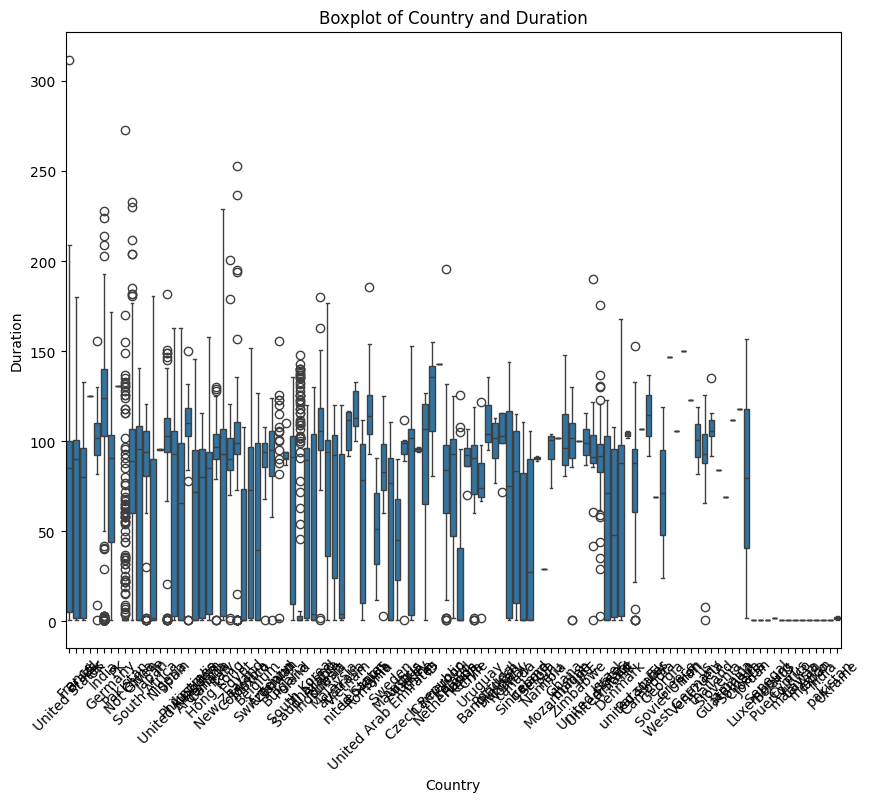

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the 'Country' and 'duration' columns

# Create the boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Country', y='duration')
plt.title('Boxplot of Country and Duration')
plt.xlabel('Country')
plt.ylabel('Duration')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



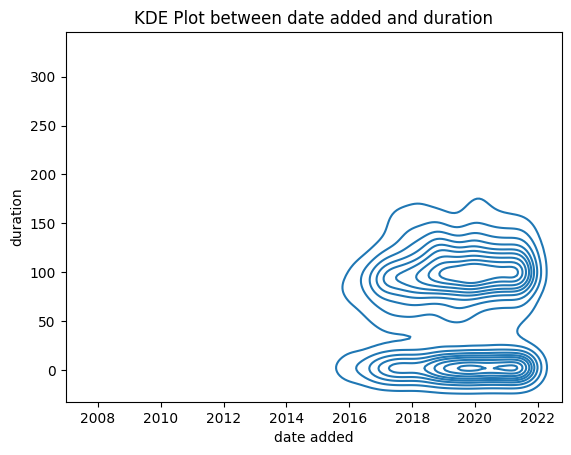

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows with null values in the 'duration' and 'date added' columns
df_filtered = df.dropna(subset=['date added', 'duration'])

# Create a KDE plot
sns.kdeplot(data=df_filtered, x='date added', y='duration')
plt.title('KDE Plot between date added and duration')
plt.xlabel('date added')
plt.ylabel('duration')
plt.show()

In [ ]:
print(df.head(500))

    show_id     Type                                              title  \
0        s1    Movie                               Dick Johnson Is Dead   
1        s3  TV Show                                          Ganglands   
2        s6  TV Show                                      Midnight Mass   
3       s14    Movie                   Confessions Of An Invisible Girl   
4        s8    Movie                                            Sankofa   
5        s9  TV Show                      The Great British Baking Show   
6       s10    Movie                                       The Starling   
7      s939    Movie                    Motu Patlu In The Game Of Zones   
8       s13    Movie                                       Je Suis Karl   
9      s940    Movie                           Motu Patlu In Wonderland   
10     s941    Movie                     Motu Patlu: Deep Sea Adventure   
11     s942    Movie                           Motu Patlu: Mission Moon   
12     s852    Movie     

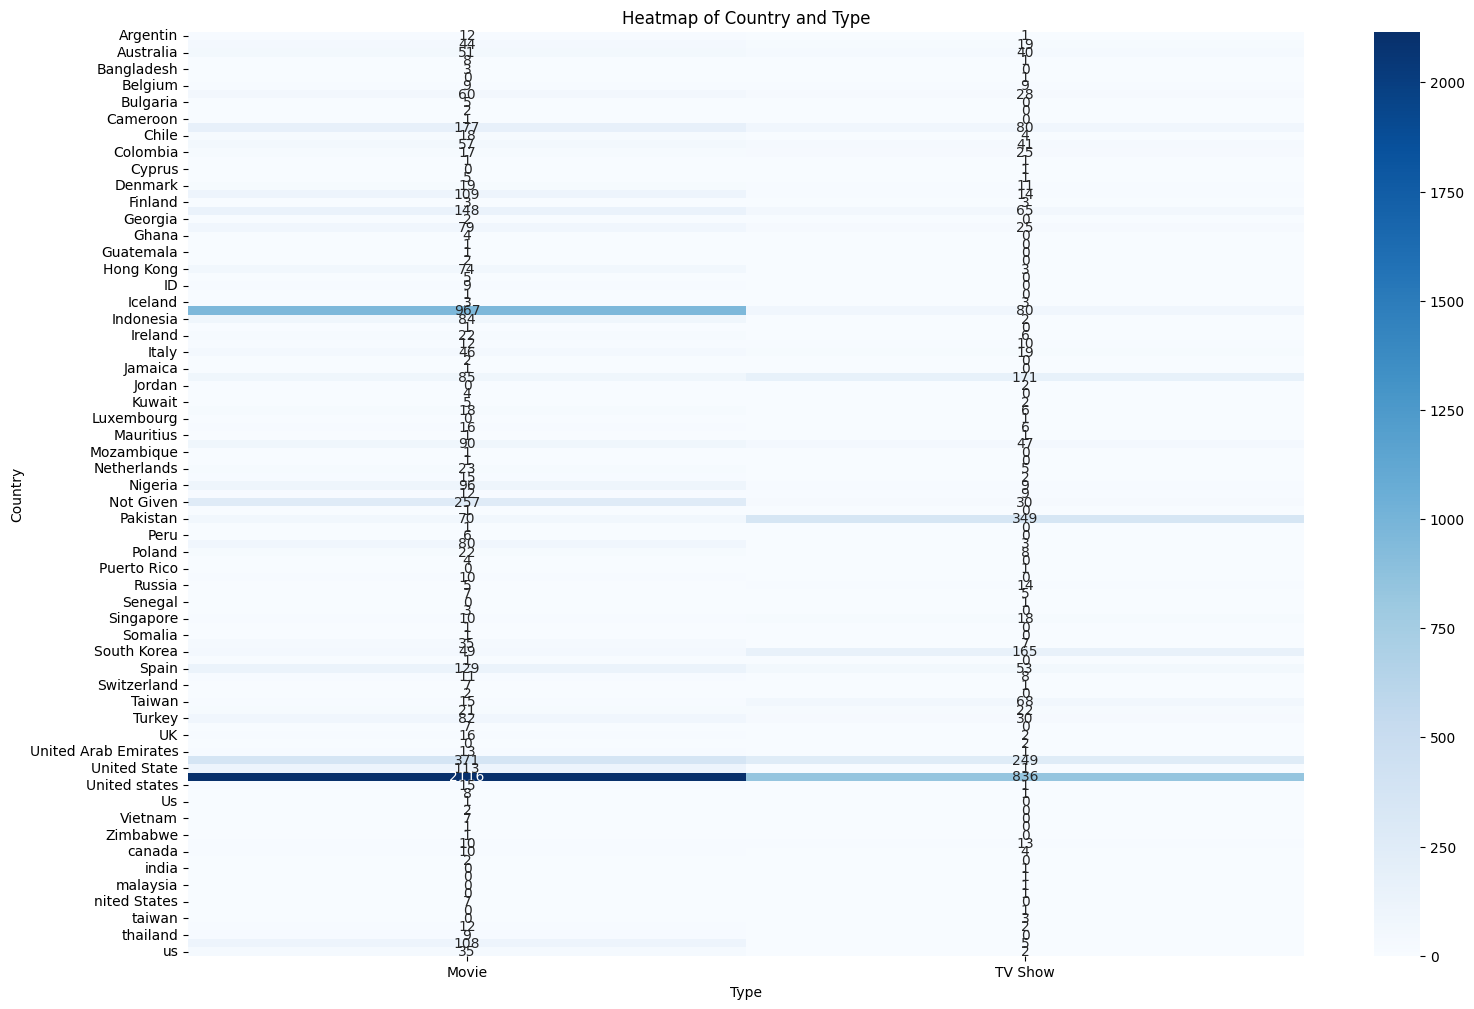

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df == convert_categories(df)

# Create a pivot table to aggregate the count of occurrences for each combination of Country and Type
pivot_table = df.groupby(['Country', 'Type']).size().unstack(fill_value=0)

# Create the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d', cbar=True)
plt.title('Heatmap of Country and Type')
plt.xlabel('Type')
plt.ylabel('Country')
plt.show()


